<a href="https://colab.research.google.com/github/Edersao/Pruebas-cient-fico-de-datos/blob/main/proyecto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Una empresa que elabora productos de consumo quiere medir la eficacia que tienen distintos tipos de medios publicitarios respecto a sus productos. La empresa se interesa específicamente en la eficacia de la publicidad en radio y en periódicos.

Se selecciona una muestra compuesta por 22 ciudades con población aproximadamente igual, para estudiarla durante un periodo de prueba de un mes. A cada ciudad se le asigna una
cantidad de gastos específicos para publicidad en radio y periódicos.

Se registraron las ventas de producto (en miles de dólares) y también los niveles medios de gastos (en miles de dólares) durante el mes de prueba, con los siguientes resultados:

In [4]:
anuncios=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datos/datos_VAD/anuncios.xlsx")
anuncios.head()

,Ciudad,Ventas,Anuncios en radio,Anuncios en periodico
0,1,973,0,40
1,2,1119,0,40
2,3,875,25,25
3,4,625,25,25
4,5,910,30,30


1. Determina la ecuación de regresión múltiple.


$ventas=\beta_0 +\beta_1 an_r + \beta_2 an_p$


2. Realiza una gráfica en tres dimensiones cuyos ejes sean ventas, anuncios en radios y
anuncios en periódicos.

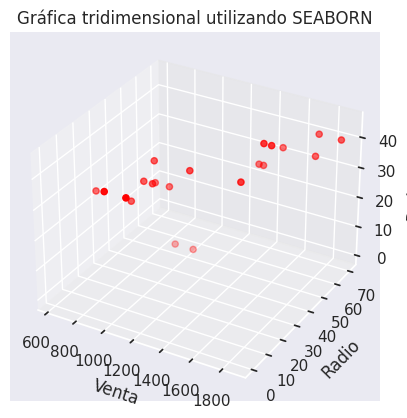

In [5]:
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

sns.set(style = "darkgrid")
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = anuncios['Ventas']
y = anuncios['Anuncios en radio']
z = anuncios['Anuncios en periodico']
ax.set_xlabel("Venta")
ax.set_ylabel("Radio")
ax.set_zlabel("Periodico")
plt.title('Gráfica tridimensional utilizando SEABORN')
ax.scatter(x, y, z, c="red")
plt.show()

3. Elabora un pronóstico de ventas para una ciudad en la que la publicidad en radio sumó
\$20,000 y la publicidad en periódicos también sumó $20,000.

In [8]:
from sklearn import linear_model
import statsmodels.api as sm

X = anuncios[['Anuncios en radio','Anuncios en periodico']]
# En este apartado incluimos las variables dependientes
Y = anuncios['Ventas']
# Utilizamos sklearn para hallar: Betta_1,Betta_2
regr = linear_model.LinearRegression()
regr.fit(X, Y)
b0=regr.intercept_
bet1_2=regr.coef_
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 156.43043453198675
Coefficients: 
 [13.08068096 16.79527808]


In [12]:
Y_est=b0+bet1_2[0]*20+bet1_2[1]*20
print('pronóstico de ventas para una ciudad en la que la publicidad en radio sumó $20,000 y la publicidad en periódicos también sumó $20,000: \n',round(Y_est,3))

pronóstico de ventas para una ciudad en la que la publicidad en radio sumó $20,000 y la publicidad en periódicos también sumó $20,000: 
 753.95
